<a href="https://colab.research.google.com/github/ishantinsights/projects/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

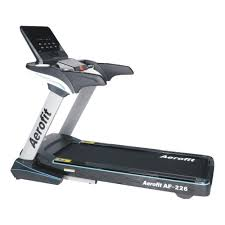

# **Business Problem:**


The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.


Key things to be analysed which will support in customer profile creation for each of the product , what factors influence the buying of a particular product

Demographic Factors- Age, Gender , Education level and Income category

Behavivarial Factors - Usage , Miles running per week and fitness level

Methodology:

1. EDA
2. Probability

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
aerofit=pd.read_csv('/content/aerofit_treadmill.txt')

In [ ]:
aerofit.to_csv('aerofit.csv')

In [ ]:
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# **Step 1 : Basic Data Checks**

In this step we will do basics checks:

1.   Shape of data
2.   Missing values
3.   Datatype of columns
4.   Duplicate Values





In [ ]:
aerofit.shape

(180, 9)

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We will change the datatype of Age into string

In [ ]:
Duplicate=aerofit.duplicated().sum()

print("{} Duplicate values.Wow!This is great".format(Duplicate))

0 Duplicate values.Wow!This is great


In [ ]:
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No Missing values. This is even better!!

# **Step 2: EDA**

In this section we will do:

1. Value Counts
2. Unique Attributes
3. Descriptive stats using Describe function
4. Univariate and bivariate analysis
5. Detect oultiers using box plot and correcting the same using clip function
6. Product wise descriptive analytics


# **UNIVARIATE ANALYSIS**


1.   Categorical( Product,Gender,Marital Status)
2.   Numeric(Age,Usage,Income,Miles)



<Axes: ylabel='Product'>

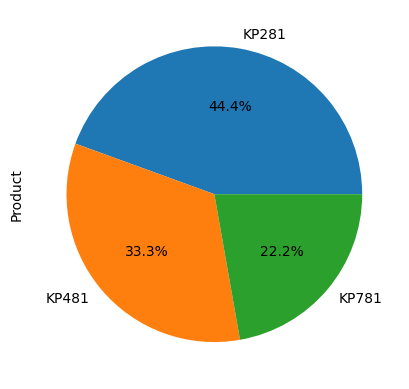

In [ ]:
# Product Distribution
aerofit.Product.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')


<Font color='orange'>Insights:

Most preferred product is KP281 i.e low end product, <font color=orange>44%
of customers prefer to buy KP281

<Axes: ylabel='MaritalStatus'>

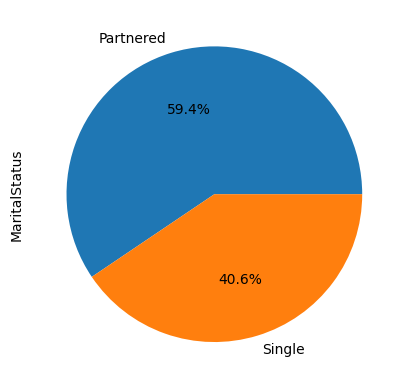

In [ ]:
# Marital Status bifurcation
aerofit.MaritalStatus.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Font color='orange'>Insights:

Couples contribute 60% in overall sales of treadmills , majority of buyers are couples



<Axes: ylabel='Gender'>

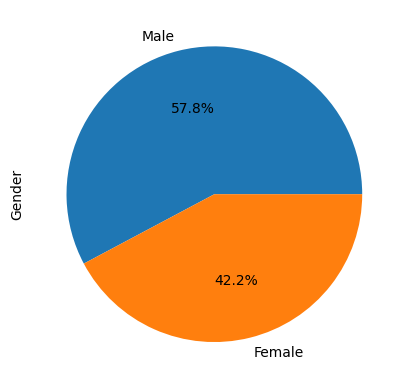

In [ ]:
# Gender bifurcation
aerofit.Gender.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<Font color='orange'>Insights:

Males contribute to 58% in overall sale of treadmills

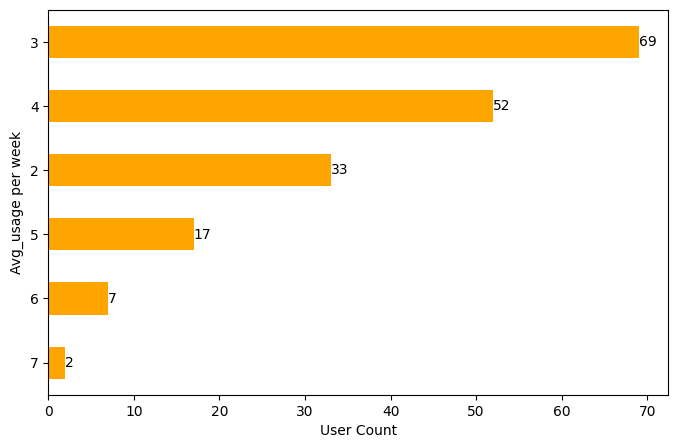

In [ ]:
# Usage
plt.figure(figsize=(8,5))
ax=aerofit.Usage.value_counts(ascending=True).plot(kind='barh',color='orange')
ax.bar_label(ax.containers[0])
plt.xlabel('User Count')
plt.ylabel('Avg_usage per week')
plt.show()


<Font color='orange'>Insights:

Most of the users use treadmill 3 times on an average in a week

<Axes: ylabel='Usage'>

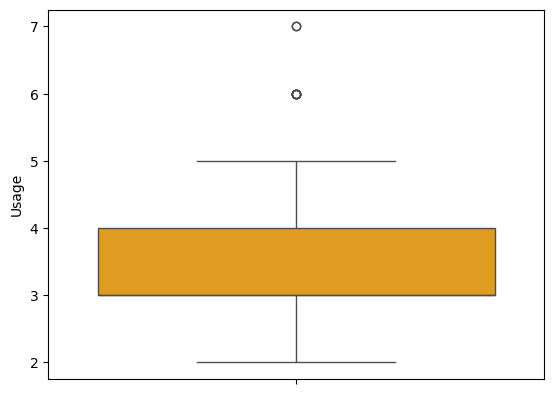

In [ ]:
# Usage Distribution
sns.boxplot(data=aerofit,y='Usage',color='orange')

<Font color='orange'>Insights:

50% of the buyers use treadmill between 3 to 4 times in a week.

 *The above data has outliers , we will fix the same in next step using np.clip*

In [ ]:
# In this step we will use clip function to set the upper and lower bound , we will bound the data between 5th and 95th percentile
lower_usage=aerofit['Usage'].quantile(0.05)
upper_usage=aerofit['Usage'].quantile(0.95)

<Axes: ylabel='Usage'>

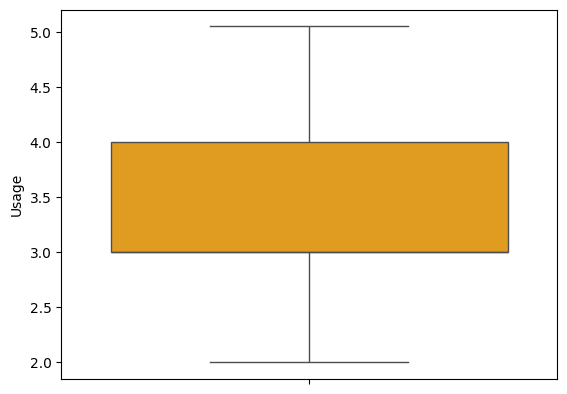

In [ ]:
aerofit['Usage'].clip(lower_usage,upper_usage,inplace=True)
#lets check if the usage has any outliers using boxplot
sns.boxplot(data=aerofit,y='Usage',color='orange') # boom no outliers

<Axes: ylabel='Age'>

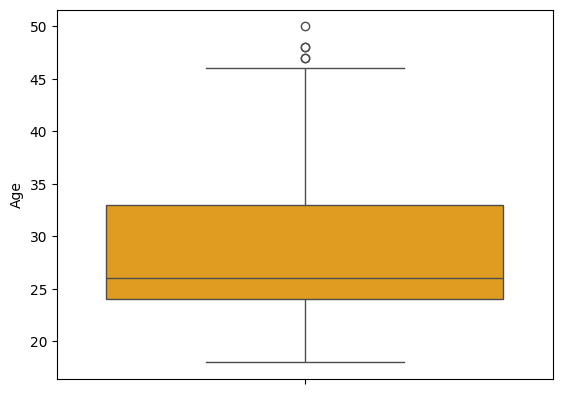

In [ ]:
# Age Distribution
sns.boxplot(data=aerofit,y='Age',color='orange')


<Font color='orange'>Insights:

Median Age of buyers is around 26 for the entire data set across all the three prodcut range.

50% of customers age is in the range ~ 23 to 33 that means people around this age tends to buy more treadmills.

 *The above data has outliers , we will fix the same in next step using np.clip*

<Axes: ylabel='Age'>

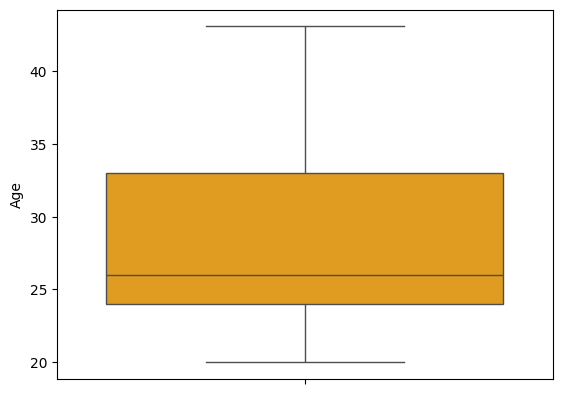

In [ ]:
# In this step we will use clip function to set the upper and lower bound , we will bound the data between 5th and 95th percentile
lower_age=aerofit['Age'].quantile(0.05)
upper_age=aerofit['Age'].quantile(0.95)
aerofit['Age'].clip(lower_age,upper_age,inplace=True)
#lets check if the 'Age' has any outliers using boxplot
sns.boxplot(data=aerofit,y='Age',color='orange') # boom no outliers

<Axes: ylabel='Income'>

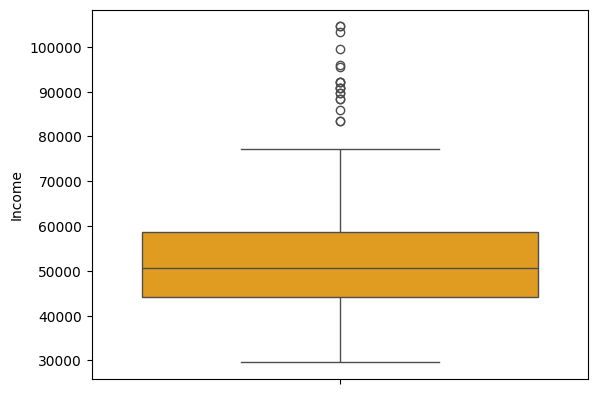

In [ ]:
# Income Distribution
sns.boxplot(data=aerofit,y='Income',color='orange')

<Font color='orange'>Insights:

Median income of buyers across all the three prodcut categories is USD 50K ,

with min income ~ USD 30K.  Income bracket of buyers is in the range 45K to 60K USD


There are outliers also present in the data , income above 80K is outlier

 *The above data has outliers , we will fix the same in next step using np.clip*





<Axes: ylabel='Income'>

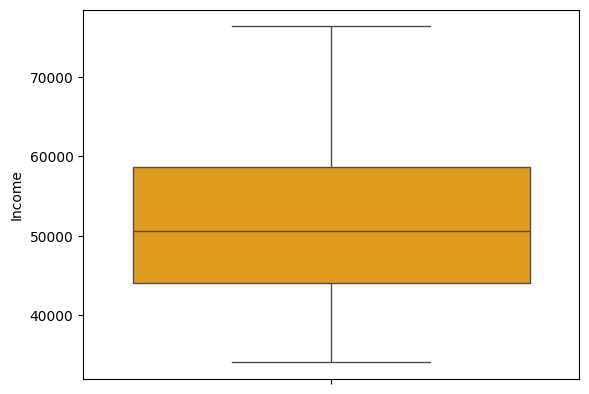

In [ ]:
# In this step we will use clip function to set the upper and lower bound , we will bound the data between 5th and 89th percentile
lower_income=aerofit['Income'].quantile(0.05)
upper_income=aerofit['Income'].quantile(0.89)
aerofit['Income'].clip(lower_income,upper_income,inplace=True)
#lets check if the 'Income' has any outliers using boxplot
sns.boxplot(data=aerofit,y='Income',color='orange') # boom no outliers

<Axes: ylabel='Miles'>

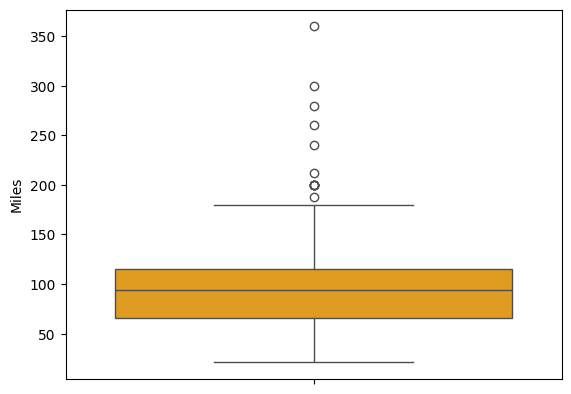

In [ ]:
# Miles Distribution
sns.boxplot(data=aerofit,y='Miles',color='orange')

<Font color='orange'>Insights:

Median miles running per week is ~ 100 miles across all the three product category. 50 % of the customers running per week is between 60 miles to 120 miles

The above data has outliers , we will fix the same in next step using np.clip

<Axes: ylabel='Miles'>

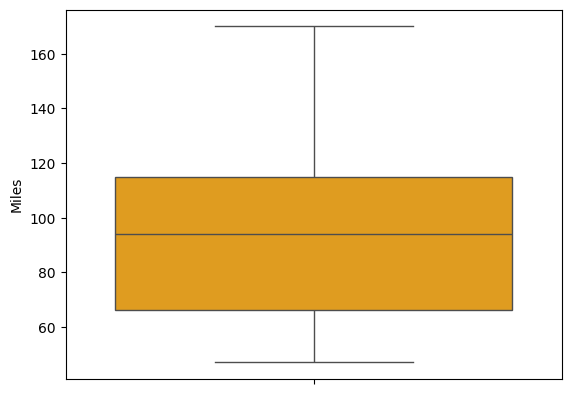

In [ ]:
 # In this step we will use clip function to set the upper and lower bound , we will bound the data between 5th and 95th percentile
lower_miles=aerofit['Miles'].quantile(0.05)
upper_miles=aerofit['Miles'].quantile(0.89)
aerofit['Miles'].clip(lower_miles,upper_miles,inplace=True)
#lets check if the 'Miles' has any outliers using boxplot
sns.boxplot(data=aerofit,y='Miles',color='orange') # boom no outliers

In [ ]:
#Descriptive Statistics
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.641389,15.572222,3.396944,3.311111,52085.090833,98.655556
std,6.446373,1.617055,0.952682,0.958869,12418.542466,38.363641
min,20.000000,12.000000,2.000000,1.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,21.000000,5.050000,5.000000,76331.950000,170.000000


Lets categorise the data for the ease of analysis

In [ ]:
# age category
def age_category(x):
  if x>=20 and x<30:
    return "Adults_20-29"
  if x>=30 and x<40:
    return "mid-aged_30-39"
  if x>=40 and x<50:
    return "elderly_40 -49"
  if X>=50:
    return "Senior Citizen_>50"




aerofit['Age_Category']=aerofit['Age'].apply(age_category)



In [ ]:
# Education category
def Edu_category(x):
  if x>=12 and x<=14:
    return "high school degree"
  if x>=15 and x<=17:
    return "Graduate degree"
  if x>=18 and x<=21:
    return "Master's degree"





aerofit['Edu_Category']=aerofit['Education'].apply(Edu_category)

In [ ]:
# Product categorization
def category(x):
  if x=="KP281":
    return 'entry level'
  if x=='KP481':
    return 'mid level'
  if x=='KP781':
    return 'advance level'

aerofit['Product Category']=aerofit['Product'].apply(category)



In [ ]:
# Income Category

def inc_category(x):
  if x<=40500:
    return "income<=40K"
  if x>40500 and x<=60500:
    return "income 40 to 60K"
  if x>60500:
    return "income >60K"





aerofit['Income_category']=aerofit['Income'].apply(inc_category)


In [ ]:
# Usage Category

def usage_category(x):
  if x>=1 and x<=2:
    return "Low_Usage 1 to 2"
  if x>2 and x<=4:
    return "Medium_Usage 3 to 4"
  if x>4:
    return "High_Usage >4"

aerofit['Usage_category']=aerofit['Usage'].apply(usage_category)

# **Product wise Analysis**

In this step we perform analysis product wise and create customer profile using descriptive analysis

In [ ]:
# Descriptive analysis for product KP281 i.e entry level product
aerofit.groupby(by='Product').get_group('KP281').describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000
mean,28.427500,15.037500,3.087500,2.96250,46584.311250,82.900000
std,6.678313,1.216383,0.782624,0.66454,8813.246103,27.610125
min,20.000000,12.000000,2.000000,1.00000,34053.150000,47.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.000000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.000000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.000000,94.000000
max,43.050000,18.000000,5.000000,5.00000,68220.000000,170.000000


In [ ]:
# Descriptive analysis for product KP481 i.e mid level product
aerofit.groupby(by='Product').get_group('KP481').describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.801667,15.116667,3.066667,2.90000,49046.607500,88.000000
std,6.327830,1.222552,0.799717,0.62977,8517.583361,29.710467
min,20.000000,12.000000,2.000000,1.00000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,43.050000,18.000000,5.000000,4.00000,67083.000000,170.000000


In [ ]:
# Descriptive analysis for product KP781 i.e high-end product
aerofit.groupby(by='Product').get_group('KP781').describe()


,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,28.828750,17.325000,4.511250,4.625000,67644.375000,146.150000
std,6.296182,1.639066,0.565401,0.667467,10778.109073,29.631541
min,22.000000,14.000000,3.000000,3.000000,48556.000000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.750000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76138.975000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,76331.950000,170.000000
max,43.050000,21.000000,5.050000,5.000000,76331.950000,170.000000


In [ ]:
aerofit.groupby(by=['Product','Gender'])['Age'].count()

Product  Gender
KP281    Female    40
         Male      40
KP481    Female    29
         Male      31
KP781    Female     7
         Male      33
Name: Age, dtype: int64

Text(0, 0.5, 'Count of users')

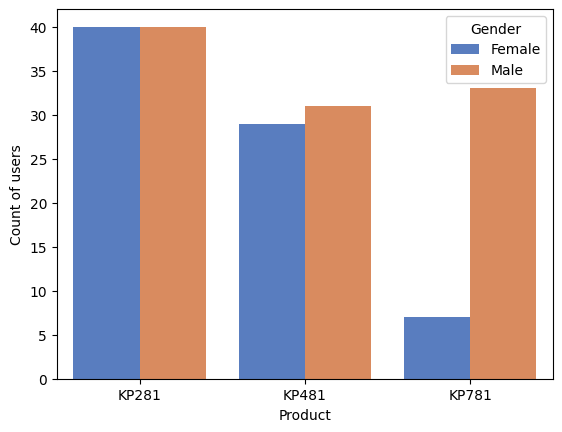

In [ ]:
sns.barplot(data=aerofit.groupby(by=['Product','Gender'])['Age'].count().reset_index(),x="Product",y='Age',hue='Gender',palette='muted')
plt.ylabel('Count of users')



<Font color='orange'> Insights:


Both male and females equally prefer KP281
Overall males prefer more as compared to females

In [ ]:
aerofit.groupby(by=['Product','MaritalStatus'])['Age'].count()

Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: Age, dtype: int64

Text(0, 0.5, 'Count of users')

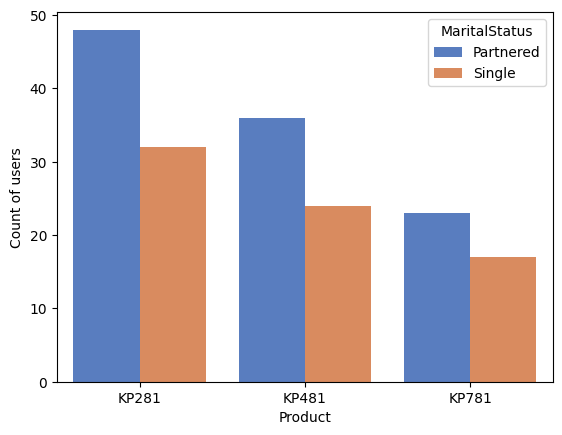

In [ ]:
sns.barplot(data=aerofit.groupby(by=['Product','MaritalStatus'])['Age'].count().reset_index(),x='Product',y='Age',hue='MaritalStatus',palette='muted')
plt.ylabel('Count of users')

<Axes: xlabel='Age', ylabel='Density'>

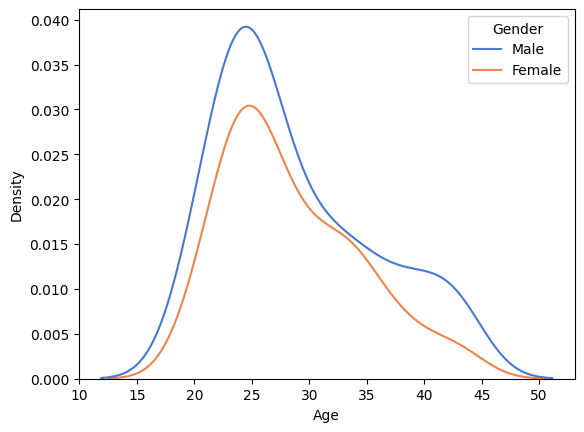

In [ ]:
sns.kdeplot(data=aerofit, x='Age', hue='Gender',palette='muted')

<Axes: ylabel='Age'>

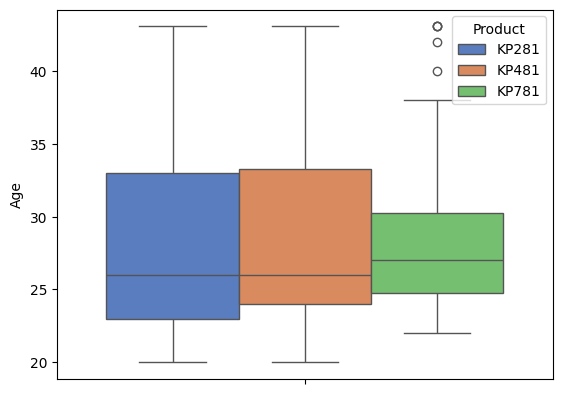

In [ ]:
sns.boxplot(data=aerofit,y='Age',hue='Product',palette='muted')

<Font color='orange'>Insights:

Median Age is  26 for entry level and mid level product.

Median Age for advance level is slightly more i.e 27

<ipython-input-37-a03faffc7cd2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aerofit,y='Income',x='Product',palette='muted')


<Axes: xlabel='Product', ylabel='Income'>

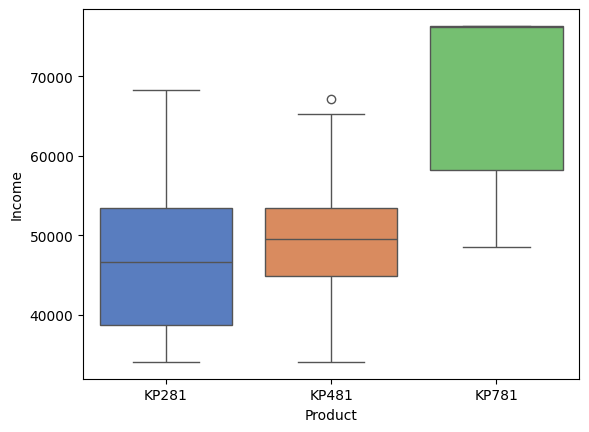

In [ ]:
sns.boxplot(data=aerofit,y='Income',x='Product',palette='muted')

<Font color='orange'> Insights:

Income range of buyers of KP281 is ~40K to 53K  with median income around 47K

Income range of buyers of KP481 is 47K to 53K with median income around 50K


<ipython-input-38-4e9d1b0f7bbc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aerofit,y='Miles',x='Product',palette='muted')


<Axes: xlabel='Product', ylabel='Miles'>

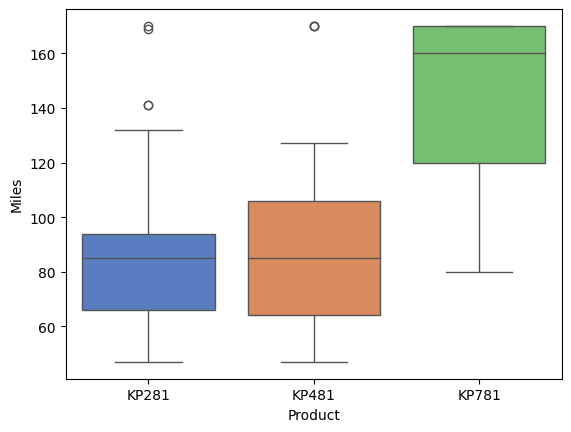

In [ ]:
sns.boxplot(data=aerofit,y='Miles',x='Product',palette='muted')

<ipython-input-39-803749e34ece>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aerofit,y='Education',x='Product',palette='muted')


<Axes: xlabel='Product', ylabel='Education'>

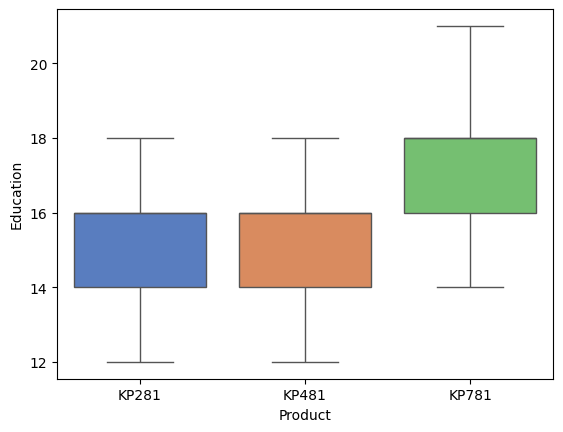

In [ ]:
sns.boxplot(data=aerofit,y='Education',x='Product',palette='muted')

In [ ]:
aerofit.groupby(by=['Product','Gender','MaritalStatus']).agg(count=('Age','count')).reset_index()

,Product,Gender,MaritalStatus,count
0,KP281,Female,Partnered,27
1,KP281,Female,Single,13
2,KP281,Male,Partnered,21
3,KP281,Male,Single,19
4,KP481,Female,Partnered,15
5,KP481,Female,Single,14
6,KP481,Male,Partnered,21
7,KP481,Male,Single,10
8,KP781,Female,Partnered,4
9,KP781,Female,Single,3


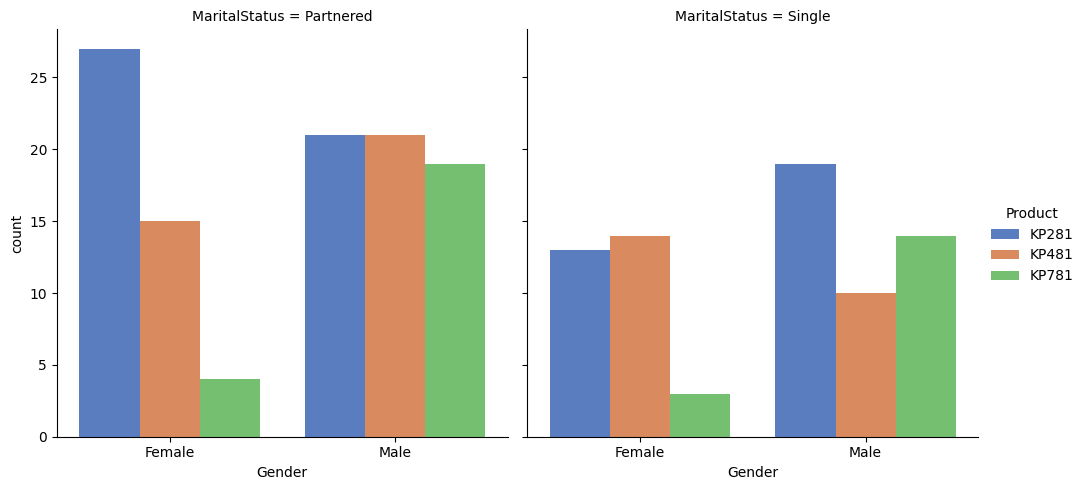

In [ ]:
sns.catplot(data=aerofit.groupby(by=['Product','Gender','MaritalStatus']).agg(count=('Age','count')).reset_index(),x='Gender',y='count',col='MaritalStatus',hue='Product',kind='bar',palette='muted')

plt.show()

<font color='orange'> Insights:

In case of couples : Females preferred product is KP281 , males preferred product is almost same across all the three products

In case of singles : Females preferred product is KP481 , males preferred product is KP281



# **Correlation and heatmap :**

In [ ]:
# Lets check how are the variables like age , Usage , Income relate to each other using correlation function and heatmapcorr=
corr=aerofit.corr()

<ipython-input-42-2d5fca28b8ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=aerofit.corr()


<Axes: >

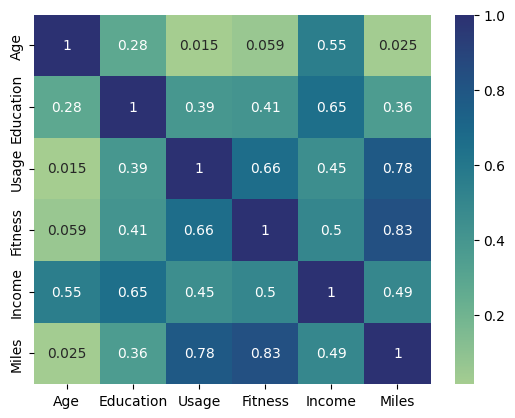

In [ ]:
sns.heatmap(data=corr,annot=True,cmap='crest')

<font color='orange'>Insights:

Weak correlation between age and usage(0.01) shows that as the age has no affect on usage of treadmill

Postive strong correlation between usage and fitness shows that treadmill usage has a postive effect in fitness level of person

Positive strong correlation between Miles and Fitness reflects more the miles running per week better the fitness level

Positive correlation between income and education



# **Calculating the probability**

1. Marginal Probablity
2. Conditional Probability

In [ ]:
# Probability of buying a particular product
aerofit.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

<font color='orange'>Insights:

Probability of buying KP281(low end product) is 0.44

Probabilty of buying KP481(mid end product) is 0.33

Probability of buying kP781 (high end product)is 0.22

In [ ]:
# Probability of particular gender buying a product
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

<font color='orange'>Insights:

Probability of Males buying a treadmill is more that that of females

Probablity of Male buying a treadmill is 0.57

Probability of female buying a treadmil is 0.42

In [ ]:
# Probability of buying product basis the MaritalStatus
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

Insgihts:

# Probability of couples buying a treadmill is more than that of singles <font color=orange>**#Couple Goals**

Probability of couples buying a treadmill is 0.59

Probability of singles buying a treadmill is 0.40

CONDITIONAL PROBABILITY/Joint Probability

# **1. Conditional Probability of buying a Product given Gender is known**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


<font color='orange'>Insights:


1.KP281(Low end product)

Probability that customer buys KP281 given gender is Male:P(KP281/Male):0.38

Probability that customer buys KP281 given gender is Female:P(KP281/Female):0.52

Female prefer KP281 more than males

2.KP481(mid end product)

Probability that customer buys KP481 given gender is Male:P(KP481/Male):0.3

Probability that customer buys K481 given gender is Female:P(KP481/Female):0.38

Both males and females have equal preference for KP481

3.KP781( high end product)

Probability that customer buys KP781 given gender is Male:P(K7481/Male):0.32

Probability that customer buys K781 given gender is Female:P(KP781/Female):0.09

Males prefer KP781 more than females


# **2. Conditional Probability of Purchasing a Product given Marital Status is known:**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


<font color='orange'>Insights:

1. KP281(Low end product)

Probability that customer buys KP281 given marital status is single:P(KP281/single):0.43
Probability that customer buys KP281 given marital status is Partenered:P(KP281/Partnered):0.45


2. KP481(mid end product)

Probability that customer buys KP481 given marital status is single:P(KP481/single):0.32

Probability that customer buys KP481 given marital status is Partnered:P(KP481/Partnered):0.34



3. KP781(high end product)

Probability that customer buys KP781 given marital status is single:P(KP781/single):0.23

Probability that customer buys KP781 given marital status is Partnered:P(KP781/Partnered):0.21










# **3. Conditional Probability of Purchasing a Product given Age is known:**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['Age_Category'],margins=True)

Age_Category,Adults_20-29,elderly_40 -49,mid-aged_30-39,All
Product,,,,
KP281,53,7,20,80
KP481,33,5,22,60
KP781,27,5,8,40
All,113,17,50,180


<font color='orange'>Insights:

Overall probability of buying a product by Adults is highest i.e 0.62 followed by mid-aged segment i.e 0.27 and very low by elderly people i.e 0.09


Conditional Probability:

P(KP281/Adults) : 0.46

P(KP281/mid-aged): 0.39

P(KP281/elderly): 0.41

P(KP481/Adults) : 0.29

P(KP481/mid-aged): 0.44

P(KP481/elderly):0.29

P(KP781/Adults) :0.23

P(KP781/mid-aged): 0.16

P(KP781/elderly):0.29



Max chances of Adults  buying a treadmill product is KP281

Max chances of mid aged buying a treadmill product is KP481

Max Chances of elderly buying a treadmill product is KP281

So overall majority of people across all the ages prefer to buy low end product which is less costly



# **4. Conditional Probability of Purchasing a Product given Education Level is known:**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['Edu_Category'],margins=True)

Edu_Category,Graduate degree,Master's degree,high school degree,All
Product,,,,
KP281,43,2,35,80
KP481,32,2,26,60
KP781,15,23,2,40
All,90,27,63,180


<font color='orange'>Insights:

Overall probability of buying a treadmill by Graduates is highest i.e 0.5 followed by high school i.e 0.35

Conditional Probability:

P(KP281/high school) : 0.55

P(KP281/Graduates): 0.47

P(KP281/Master's): 0.07

P(KP481/high school) : 0.41

P(KP481/Graduates): 0.35

P(KP481/Master's):0.07

P(KP781/high school) :0.03

P(KP781/Graduates): 0.16

P(KP781/Master's):0.85

Maximum chances of customers buying a product having a master degree is KP781

Maximum chances of customers buying a product having a Graduate degree is KP281

Maximum Chances of customers buying a product having a high school education in KP281



# **5. Conditional Probability of Purchasing a Product given Income level is known:**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['Income_category'],margins=True)

Income_category,income 40 to 60K,income >60K,income<=40K,All
Product,,,,
KP281,53,4,23,80
KP481,45,6,9,60
KP781,11,29,0,40
All,109,39,32,180


<font color='orange'>Insights:

Overall probability of
<font color=orange>Income group 40 to 60k <font color=white>buying a treadmill product is <font color=orange>highest i.e 0.60

P(KP281/Income<=40K) : 0.71

P(KP281/Income 40 to 60K):0.48

P(KP281/Income >60K): 0.10



P(KP481/Income<=40K) : 0.28

P(KP481/Income 40 to 60K):0.41

P(KP481/Income >60K): 0.15


<Font color=red>**P(KP781/Income<=40K) : 0.00**

P(KP781/Income 40 to 60K):0.10

P(KP781/Income >60K):0.74



# **6. Conditional Probability of Purchasing a Product given usage level is known:**

In [ ]:
pd.crosstab(aerofit['Product'],aerofit['Usage_category'],margins=True)

Usage_category,High_Usage >4,Low_Usage 1 to 2,Medium_Usage 3 to 4,All
Product,,,,
KP281,2,19,59,80
KP481,3,14,43,60
KP781,21,0,19,40
All,26,33,121,180


<font color='orange'>Insights:

Overall probability(0.67)of users using treadmill in a week is highest in medium usage category i.e 3 to 4 times in a week . Most of the users use 3 to 4 times in a week on an average

P(KP281/Low_Usage 1 to 2) :0.57

P(KP281/Medium_Usage 3 to 4):0.48

P(KP281/High_Usage >4): 0.07

P(KP481/Low_Usage 1 to 2) :0.42

P(KP481/Medium_Usage 3 to 4):0.35

P(KP481/High_Usage >4): 0.11


<Font color=red>**P(KP781/Low_Usage 1 to 2) :0**

P(KP781/Medium_Usage 3 to 4):0.15

P(KP781/High_Usage >4):0.80






# **Customer Profiling for Each AeroFit Treadmill Product and Recommendations**

🏋KP281 Treadmill (Entry-Level):

**Age Profile:** The median age of customers purchasing the KP281 treadmill is 26. The majority of customers fall within the age range of 23 to 33 years.

**Gender Profile:** Both males and females show almost equal interest in purchasing the KP281 treadmill, with males slightly outnumbering females.

**Income Profile:** The median income of customers across all product categories is around $50,000.

The income range for KP281 customers is diverse, with a significant portion falling between $39000 to $53000

**Marital Status Profile:** Partnered individuals are slightly more inclined to purchase the KP281 treadmill compared to single individuals.

🏋KP481 Treadmill (Mid-Level):

Age Profile: The median age of customers purchasing the KP481 treadmill is similar to that of the KP281 treadmill, around 26 years. The age distribution is consistent across all product categories.

Gender Profile: Both males and females show almost equal interest in purchasing the KP481 treadmill, with a slightly higher preference for males.

Income Profile: The income range for KP481 customers is slightly narrower as compared to KP281, with a significant portion falling between $45000 - $53,000.

Marital Status Profile: Similar to the KP281 treadmill, partnered individuals are slightly more inclined to purchase the KP481 treadmill compared to single individuals.

🏋KP781 Treadmill (Advanced-Level):

Age Profile: The median age of customers purchasing the KP781 treadmill is slightly higher than the entry and mid-level treadmills, around 27 years.

Gender Profile: There is a noticeable preference among males for the KP781 treadmill compared to females.

Income Profile: The income range for KP781 customers tends to be higher, with a significant portion falling above $60,000.

Marital Status Profile: Partnered individuals are more inclined to purchase the KP781 treadmill compared to single individuals.


# **Recommendations:**

Targeted Marketing: Tailor marketing campaigns to appeal to the identified demographics for each treadmill product. Highlight features and benefits that resonate with the age, gender, income level, and marital status of the target audience.

Product Positioning: Position the KP281 treadmill as an affordable option suitable for individuals with lower incomes or those looking for basic functionality. Emphasize durability and ease of use.

Value-Added Services: Offer additional services such as maintenance packages or virtual training sessions to enhance the perceived value of mid-level and advanced-level treadmills.

Price Optimization: Adjust pricing strategies to align with the income range of target customers for each treadmill product. Consider bundling options or installment plans to make higher-priced models more accessible.

Customer Engagement: Implement loyalty programs or referral incentives to encourage repeat purchases and word-of-mouth marketing within the identified customer segments.




42% of Aerofit customers are females and also, we have seen males are mostly using the Aerofit treadmills per week. Percentage of females using the Aerofit treadmills more than 3 days per week is very low compared to males.

It has been observed that Males have rated themselves higher in fitness with 3.5 rating compared to females with 3.0 rating

As age is increasing females are clocking less miles than males. There’s a considerable dip in miles run/walk in 40-50 years females when compared to males.


So, Aerofit should focus on how to increase their sales to females more, maybe through advertising and also customizing/launching products suitable for females especially elderly females.

Increase KP781 sales and bring it at par with other products
KP781 sales is only at 22.22%.

A huge difference has been observed between males and females using the KP781 treadmill.

KP781 is not a popular product among females as only 3.89% females are buying it and probability that the purchase will be KP781 given that the customer is female is only 9.21%.

So Aerofit should inspect on why KP781 sales is very low among females and take necessary action to make it more suitable for both male and female customers.
Also KP781 is the least favorite among middle-aged adults (30-39 years) as they are using the other 2 products almost equally.

Probability that the purchase will be KP781 given that the customer is a Middle-Aged Adult stands at only 16% while the other 2 products KP281 and KP481 stands at 40% and 44% respectively. Even though middle-aged adults are in Middle or Upper income groups they are not preferring KP781 product So Aerofit should target middle-age adults between the age bracket 30-39 years to increase their KP781 sales.


It has been observed that KP781 is being used by highly educated, belonging to upper income and fitness enthusiast/professional customers, so they should market this as their premium model and target this customer profile more.
Boost KP481 sales among fitness-conscious customers


KP481 treadmill is a premium model than KP281, but the average fitness rating of the customers using KP481(2.9) is little bit lower than KP281(2.96). In fact it is the lowest as KP781 average fitness rating is 4.62. So, it seems like there is some problem with this product where fitness enthusiasts or professionals are avoiding this product.


Aerofit should do some survey, get customer feedback from these fitness-conscious (fitness rating 4 and 5) customers about any issues with this product and take necessary action to make it more popular among these customers.



